In [3]:
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
from sklearn.decomposition import PCA
from sklearn import datasets, metrics

postgres_user = 'dsbc_student'
postgres_pw = '7*.8G9QH21'
postgres_host = '142.93.121.174'
postgres_port = '5432'
postgres_db = 'heartdisease'

engine = create_engine('postgresql://{}:{}@{}:{}/{}'.format(postgres_user, postgres_pw, 
                                                            postgres_host, postgres_port, postgres_db))
data = pd.read_sql_query('select * from heartdisease', con=engine)
engine.dispose()

In [6]:
X = data.iloc[:, :13]
y = data.iloc[:, 13]

# Replace missing values (marked by ?) with a 0
X = X.replace(to_replace='?', value=0)

# Binarize y so that 1 means heart disease diagnosis and 0 means no diagnosis
y = np.where(y > 0, 0, 1)

scaler = StandardScaler()
X = scaler.fit_transform(X)

In [39]:
dbscan = DBSCAN(eps=3, min_samples=3)
pred = dbscan.fit_predict(X)

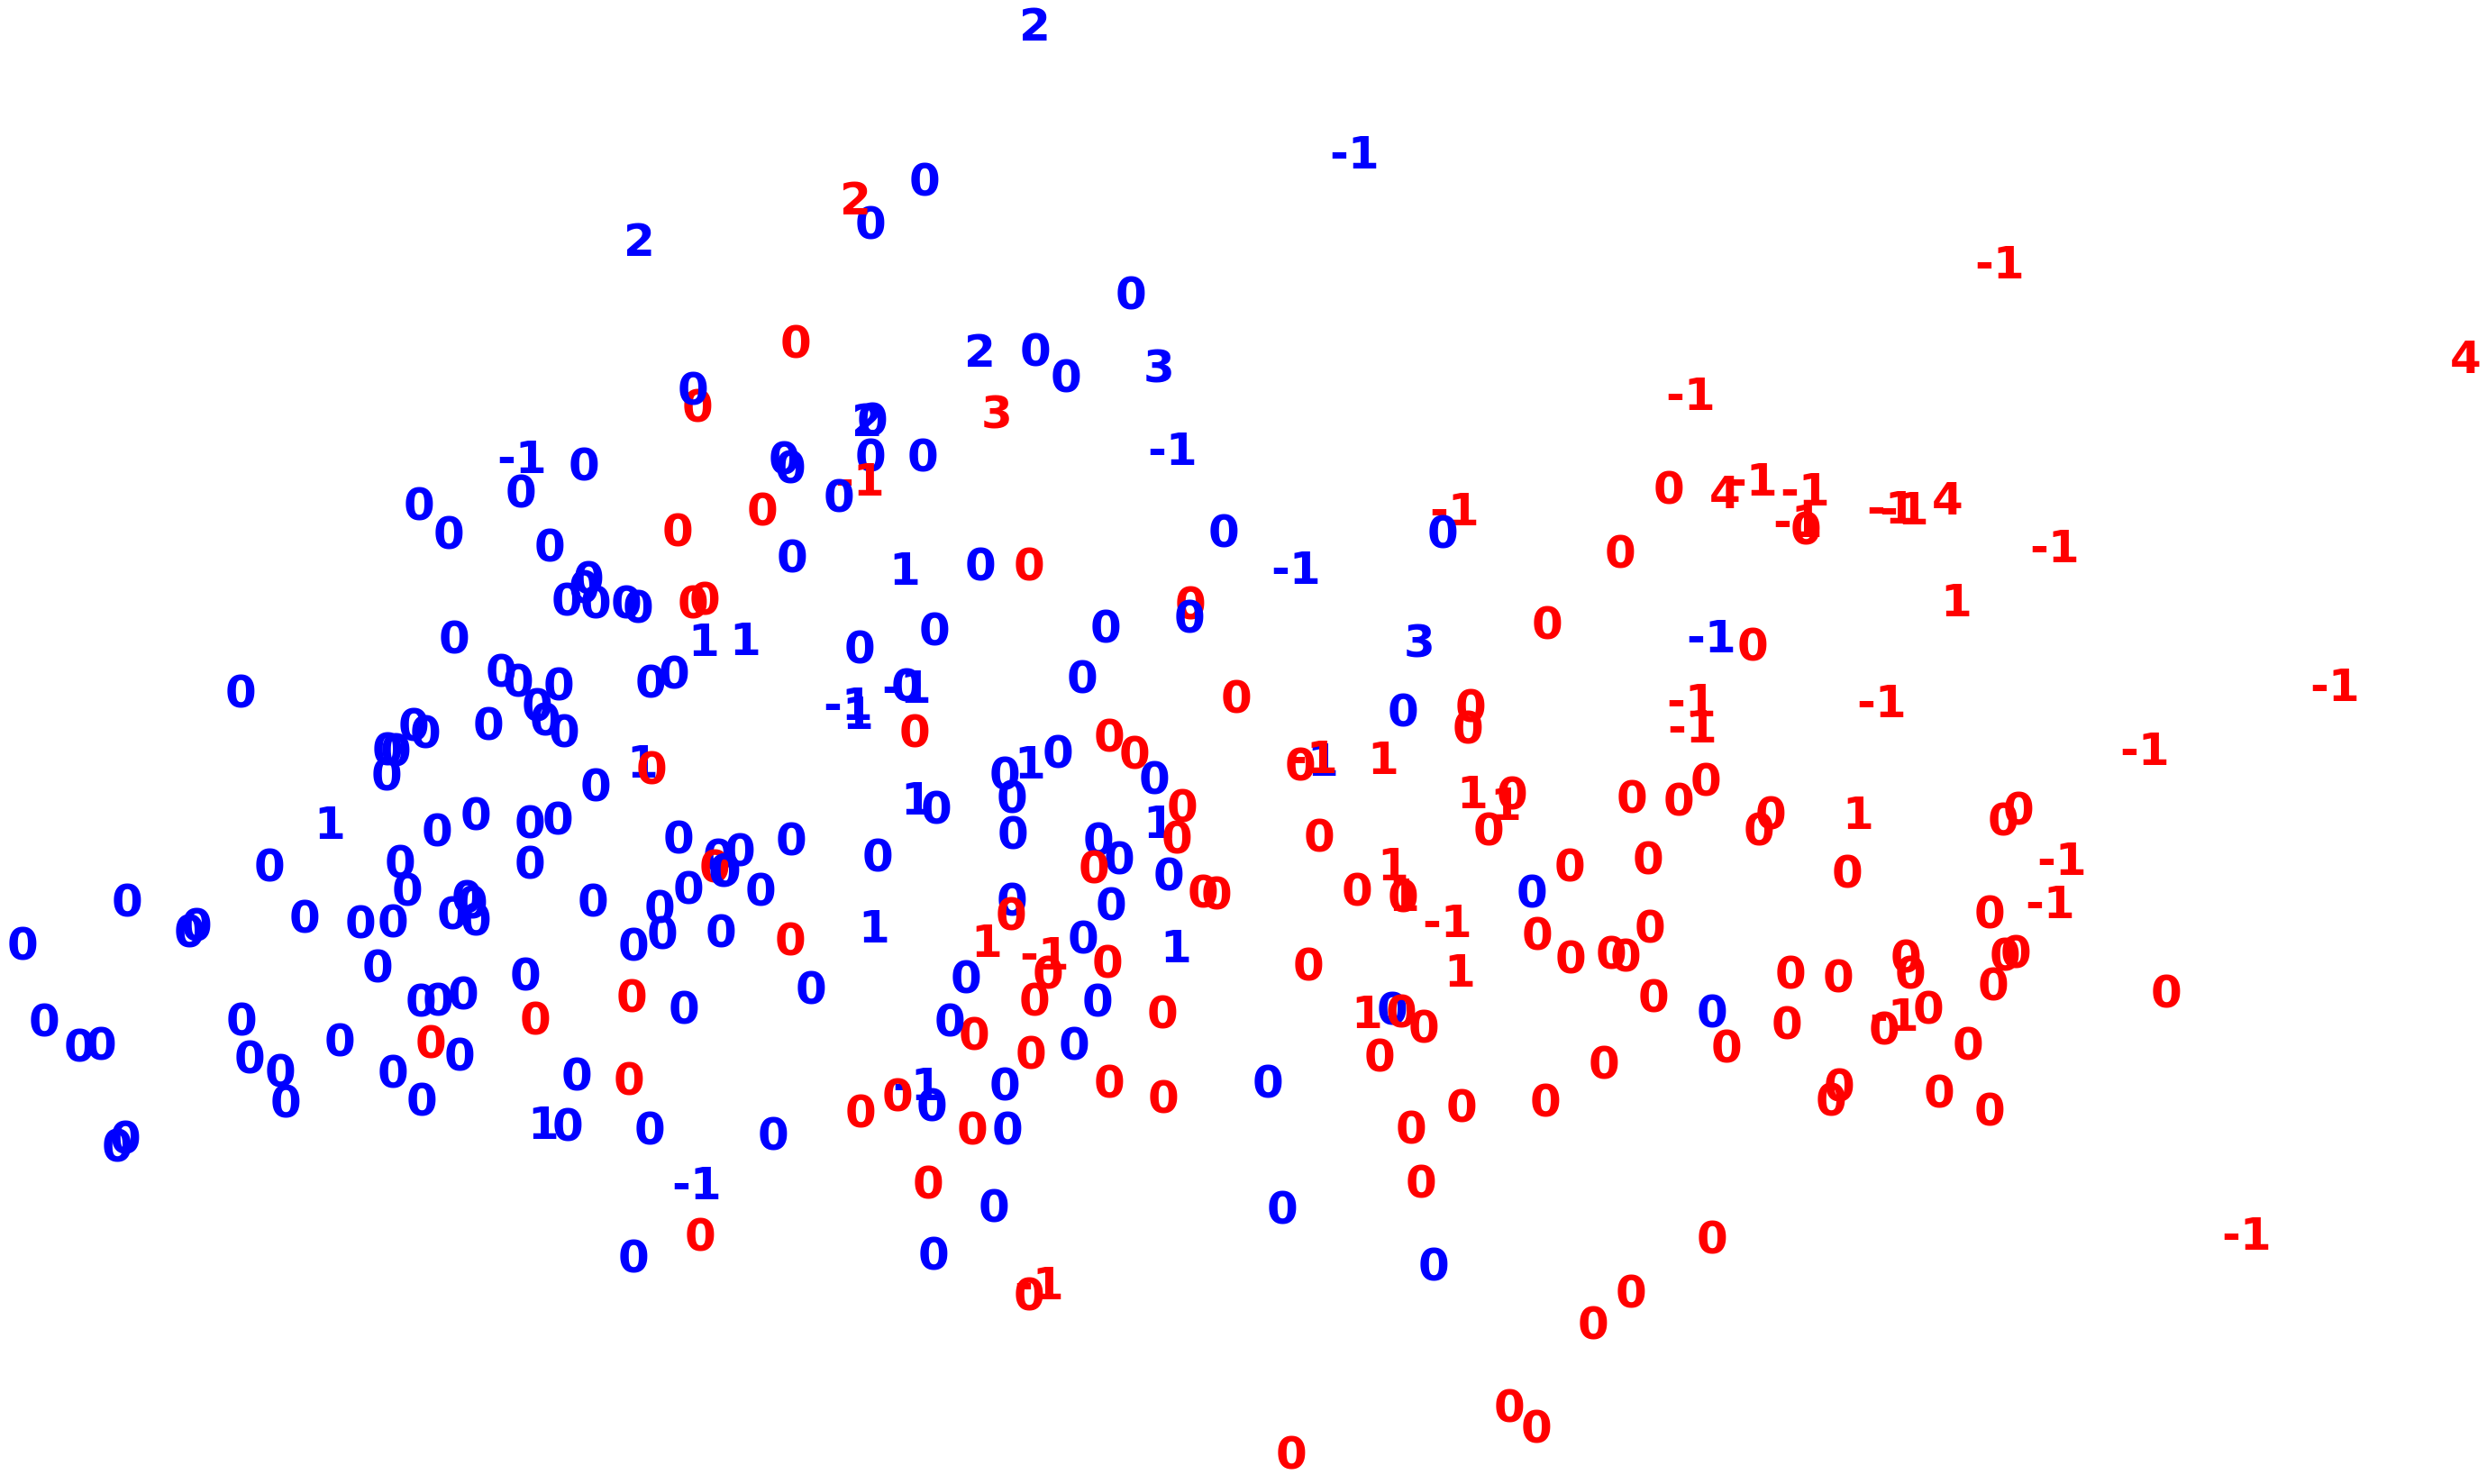

In [40]:
pca = PCA(n_components=2).fit_transform(X)

colours = 'rbg'
for i in range(pca.shape[0]):
    plt.text(pca[i,0], pca[i,1], str(pred[i]), color=colours[y[i]], 
             fontdict={'weight': 'bold', 'size': 50})
    
plt.xticks([])
plt.yticks([])
plt.axis('off')
plt.show()

In [49]:
num = []
for i in range(1, 20):
    dbscan = DBSCAN(eps=1, min_samples=i, metric='euclidean')
    pred = dbscan.fit_predict(X)
    num.append(len(np.unique(pred)))
print(num)

[294, 9, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]


In [50]:
ep = []
for i in range(1, 20):
    dbscan = DBSCAN(eps=i, min_samples=1, metric='euclidean')
    pred = dbscan.fit_predict(X)
    ep.append(len(np.unique(pred)))
print(ep)

[294, 178, 34, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
